<a href="https://colab.research.google.com/github/feoandrew/MachineLearning/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_09_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
data.shape

(103904, 25)

In [134]:
data.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
85832,85832,25514,Male,disloyal Customer,47,Business travel,Eco,116,1,0,...,5,3,2,3,4,5,5,0,0.0,neutral or dissatisfied
34986,34986,7448,Male,Loyal Customer,23,Personal Travel,Eco,522,3,5,...,5,5,3,4,5,4,5,0,0.0,neutral or dissatisfied
36057,36057,11938,Male,Loyal Customer,47,Business travel,Eco,781,2,5,...,1,4,1,3,4,3,1,38,27.0,neutral or dissatisfied
93575,93575,80385,Female,disloyal Customer,22,Business travel,Eco,368,4,5,...,4,4,1,3,3,5,4,0,0.0,neutral or dissatisfied
63831,63831,61959,Female,Loyal Customer,64,Personal Travel,Eco,2161,4,5,...,5,5,4,5,4,5,5,16,45.0,satisfied
27609,27609,108419,Female,Loyal Customer,45,Business travel,Business,1444,4,4,...,4,4,5,4,5,4,4,0,0.0,satisfied
93969,93969,64391,Male,Loyal Customer,56,Personal Travel,Eco,1172,2,1,...,5,3,5,3,4,4,5,30,23.0,neutral or dissatisfied
32643,32643,64997,Male,Loyal Customer,17,Business travel,Business,1566,2,2,...,5,5,5,4,3,2,5,15,7.0,satisfied
38097,38097,113573,Male,Loyal Customer,66,Business travel,Business,2951,4,2,...,5,5,5,5,4,5,3,0,0.0,satisfied
103793,103793,118871,Female,Loyal Customer,47,Business travel,Business,1551,1,1,...,4,4,4,4,5,4,3,22,25.0,satisfied


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

По полученному описанию можно определить наличие пропущенных значений. Категориальные признаки Gender, Customer Type, Type of Travel, Class,  satisfaction остальные признаки числовые либо даты.

In [136]:
data.Gender = data.Gender.astype('category')
data_test.Gender = data_test.Gender.astype('category')
data.Gender.dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [137]:
 data['Customer Type']=data['Customer Type'].astype('category')
 data_test['Customer Type'] = data_test['Customer Type'].astype('category')
 data['Customer Type'].dtype

CategoricalDtype(categories=['Loyal Customer', 'disloyal Customer'], ordered=False)

In [138]:
 data['Type of Travel']=data['Type of Travel'].astype('category')
 data_test['Type of Travel']=data_test['Type of Travel'].astype('category')
 data['Type of Travel'].dtype

CategoricalDtype(categories=['Business travel', 'Personal Travel'], ordered=False)

In [139]:
data.Class = data.Class.astype('category')
data_test.Class = data_test.Class.astype('category')
data.Class.dtype

CategoricalDtype(categories=['Business', 'Eco', 'Eco Plus'], ordered=False)

In [140]:
data.satisfaction = data.satisfaction.astype('category')
data_test.satisfaction = data_test.satisfaction.astype('category')
data.satisfaction.dtype

CategoricalDtype(categories=['neutral or dissatisfied', 'satisfied'], ordered=False)

Удаляем ненужные колонки

In [141]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)

data_test.drop(['Unnamed: 0'], axis=1, inplace=True)
data_test.drop(['id'], axis=1, inplace=True)


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

# Визуализация и основные характеристики

Математическое описание для каждого числового столбца

In [143]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Посмотрим на соотношение классов

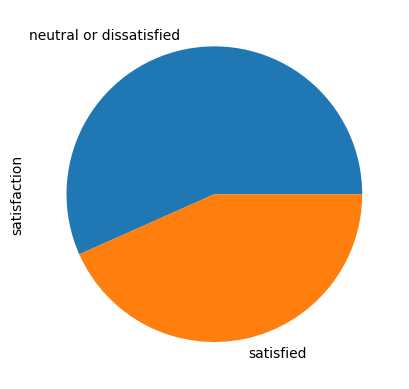

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
data.satisfaction.value_counts().plot.pie()
pass

Классы выглядят сбалансированными, не будем их трогать

Рассмотрим значения категориальных признаков:

Пол пассажиров:

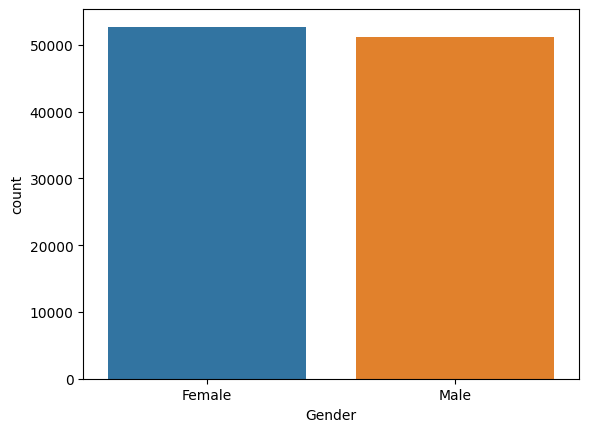

In [145]:
sns.countplot(x='Gender', data=data)
pass

Постоянный клиент или нет

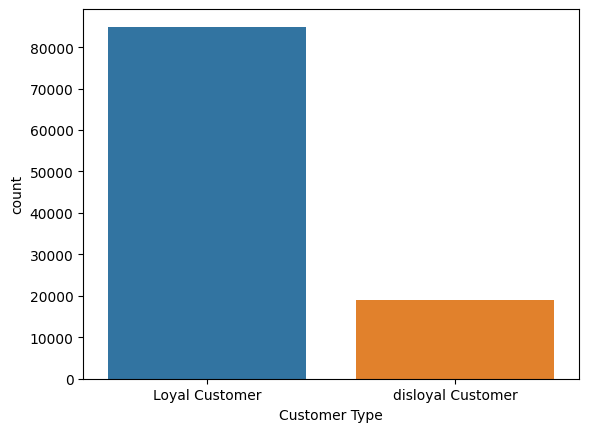

In [109]:
sns.countplot(x='Customer Type', data=data)
pass

Вид путешествия

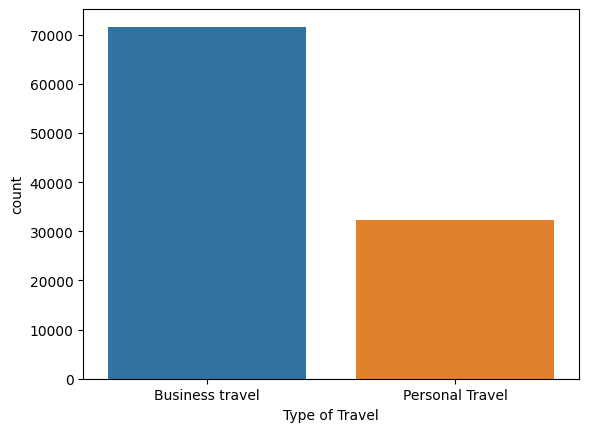

In [110]:
sns.countplot(x='Type of Travel', data=data)
pass

Класс в котором летел пассажир

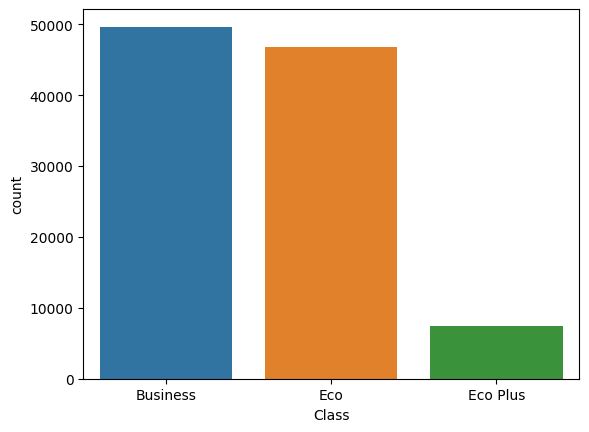

In [111]:
sns.countplot(x='Class', data=data)
pass

Распределение клиентов по длительности задержки вылета

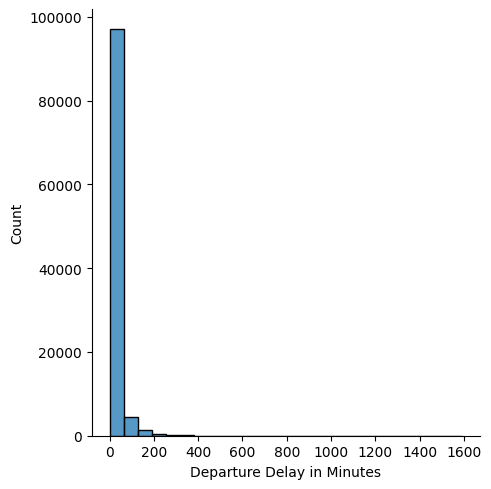

In [112]:
sns.displot(data['Departure Delay in Minutes'], bins=25)
pass

Распределение клиентов по длительности задержки посадки

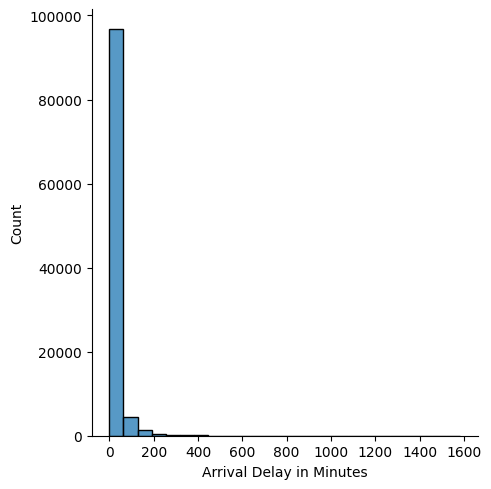

In [113]:
sns.displot(data['Arrival Delay in Minutes'], bins=25)
pass

<ipython-input-146-65701213b2af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


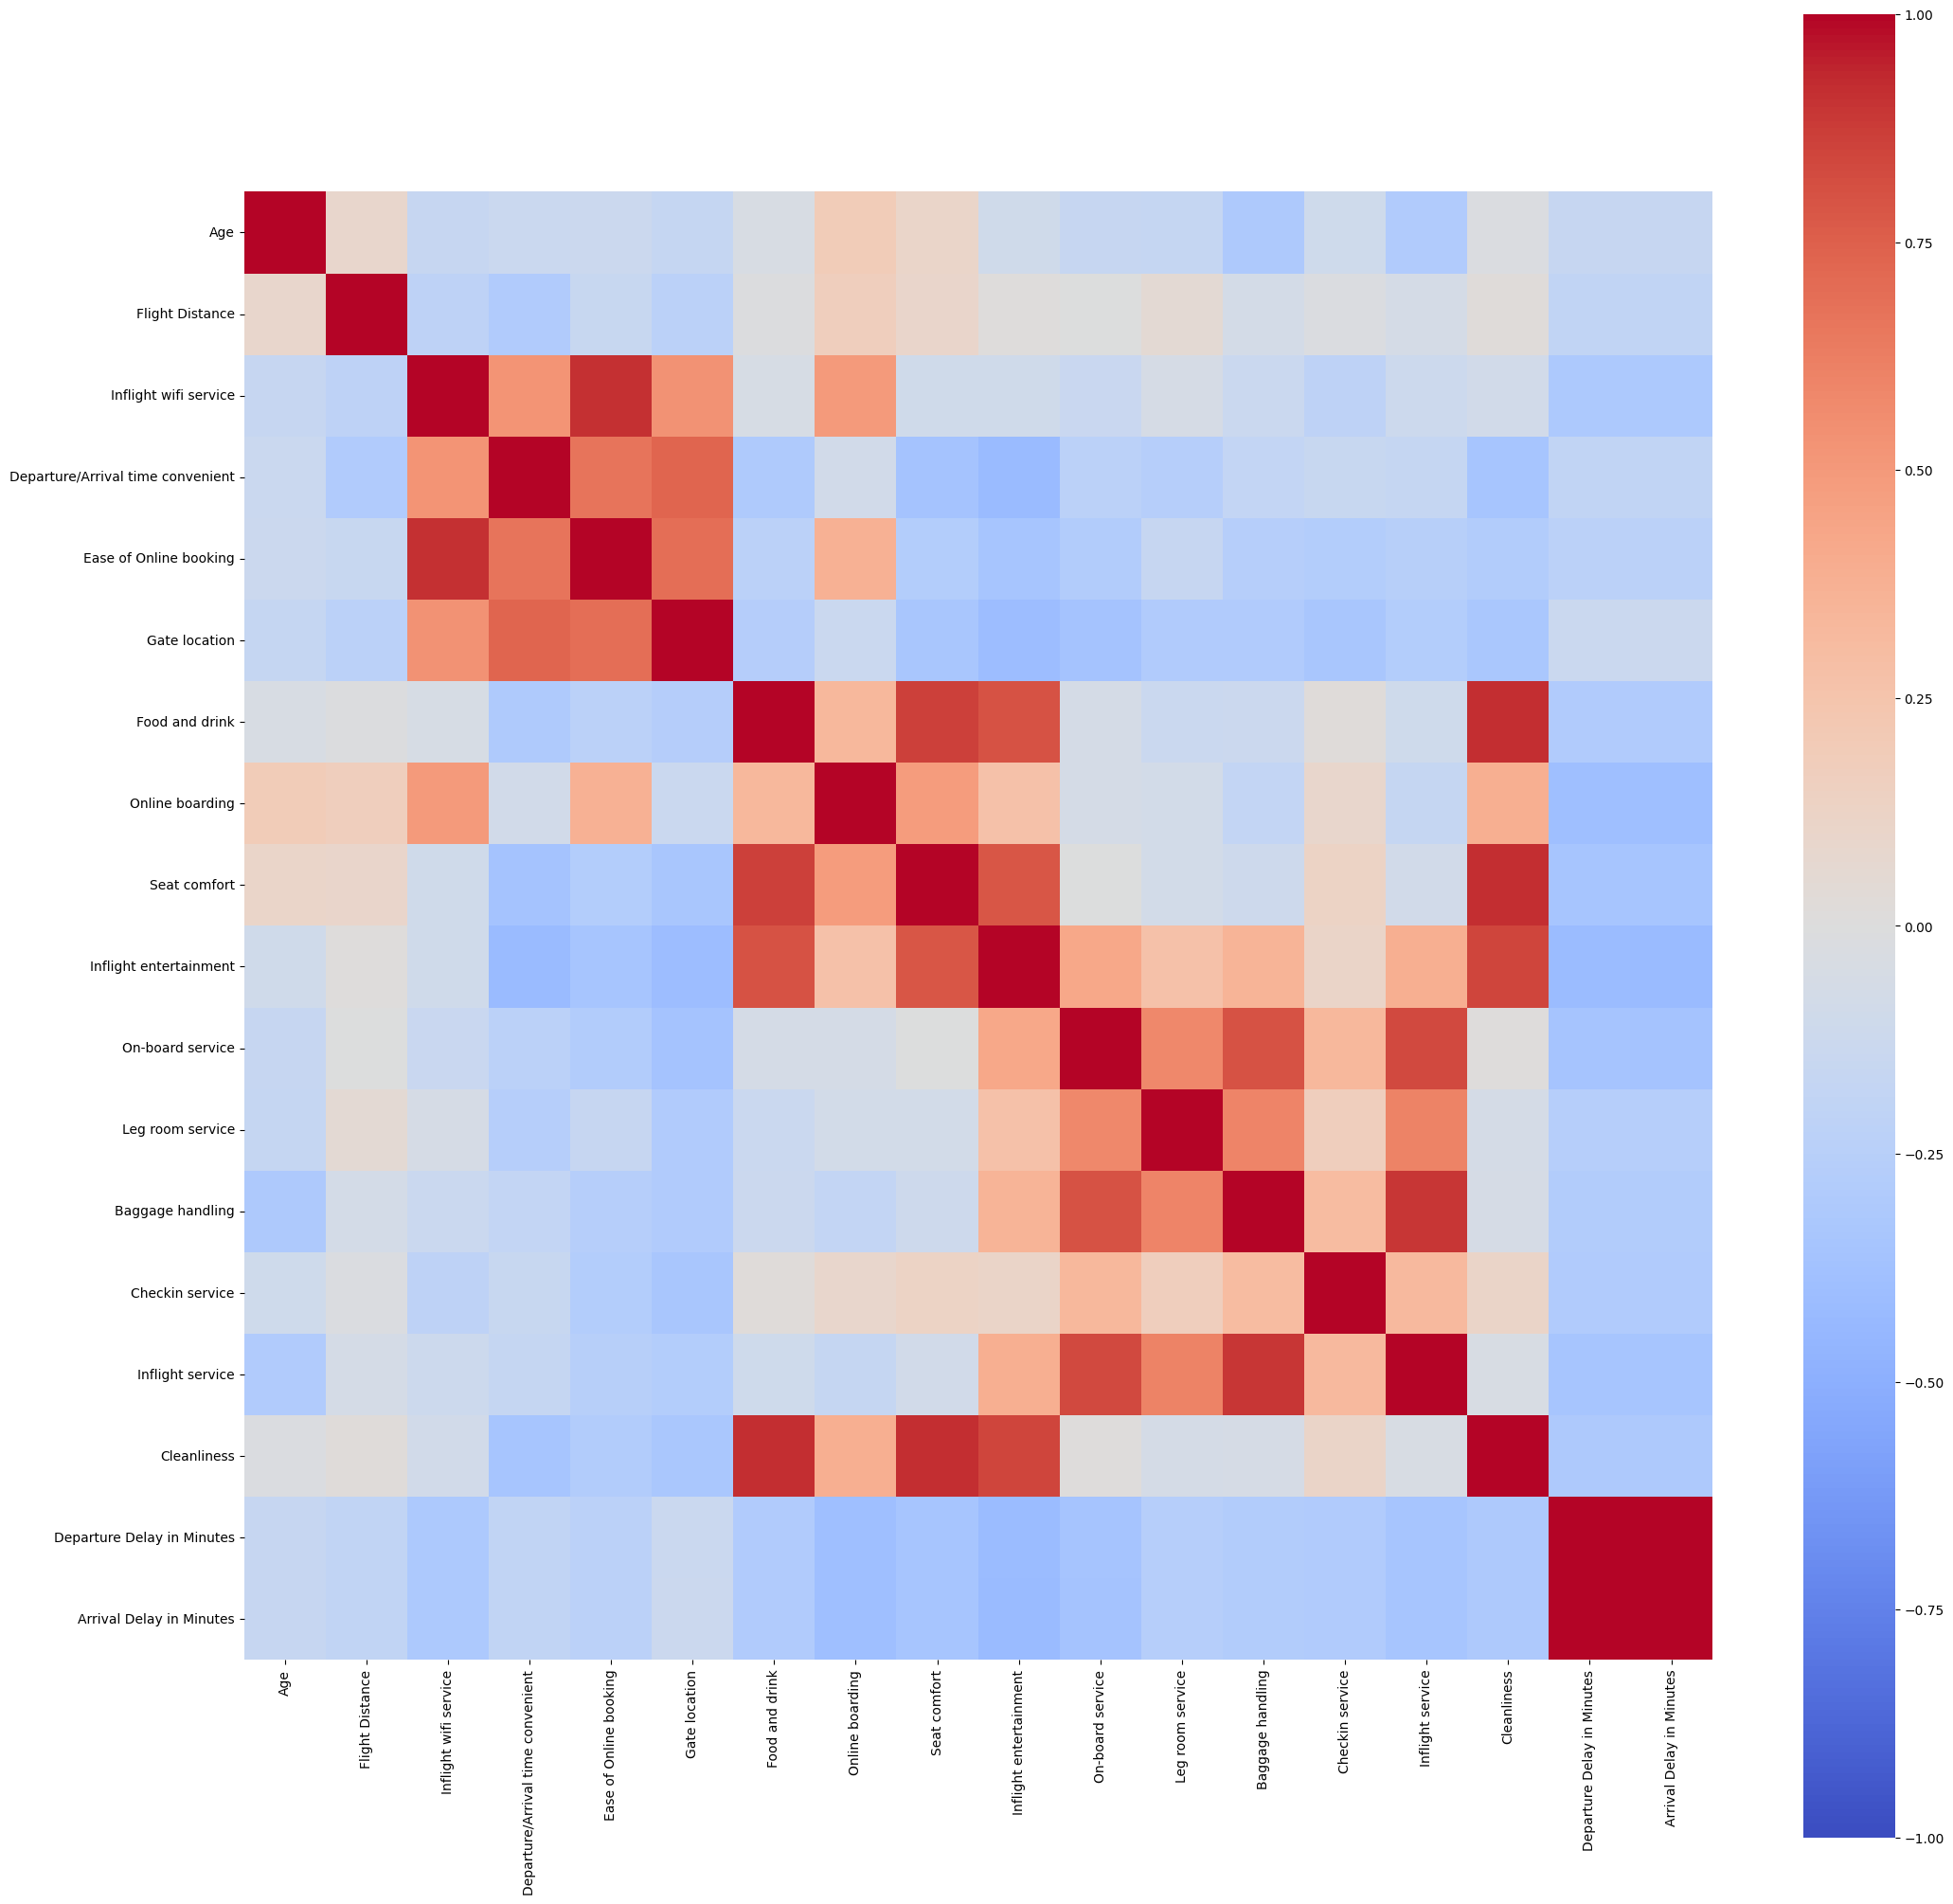

In [146]:
corr = data.corr()
plt.subplots(figsize=(25, 25))
sns.heatmap(corr.corr(), square=True, vmin = -1.0, vmax = 1.0, cmap='coolwarm')
pass

Получим список признаков в которых есть корреляция

In [147]:
import numpy as np
corr.where(np.triu(corr > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
Inflight wifi service       Ease of Online booking      0.715856
Inflight entertainment      Cleanliness                 0.691815
Seat comfort                Cleanliness                 0.678534
Food and drink              Cleanliness                 0.657760
Baggage handling            Inflight service            0.628561
Food and drink              Inflight entertainment      0.622512
Seat comfort                Inflight entertainment      0.610590
Food and drink              Seat comfort                0.574556
On-board service            Inflight service            0.550782
                            Baggage handling            0.519134
dtype: float64

# Обработка пропущенных значений

In [116]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заменим медианой

In [148]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data_test.fillna(data.median(axis = 0), axis=0 , inplace=True)

<ipython-input-148-82bf7aa5b711>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis = 0), axis=0 , inplace=True)
<ipython-input-148-82bf7aa5b711>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_test.fillna(data.median(axis = 0), axis=0 , inplace=True)


проверим

In [118]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Категориальные признаки

используем метод бинаризации

In [149]:
gen_dummies = pd.get_dummies(data.Gender)
customer_type_dummies = pd.get_dummies(data['Customer Type'])
travel_type_dummies = pd.get_dummies(data['Type of Travel'])
сlass_dummies = pd.get_dummies(data.Class)
satisfaction = pd.get_dummies(data.satisfaction)



In [150]:
data.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis=1, inplace=True)
data = pd.concat((data, gen_dummies), axis=1)
data = pd.concat((data, customer_type_dummies), axis=1)
data = pd.concat((data, travel_type_dummies), axis=1)
data = pd.concat((data, сlass_dummies), axis=1)
data = pd.concat((data, satisfaction), axis=1)


In [121]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

Делаем тоже самое для тестовых данных

In [151]:
gen_dummies = pd.get_dummies(data_test.Gender)
customer_type_dummies = pd.get_dummies(data_test['Customer Type'])
travel_type_dummies = pd.get_dummies(data_test['Type of Travel'])
сlass_dummies = pd.get_dummies(data_test.Class)
satisfaction = pd.get_dummies(data_test.satisfaction)

In [152]:
data_test.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], axis=1, inplace=True)
data_test = pd.concat((data_test, gen_dummies), axis=1)
data_test = pd.concat((data_test, customer_type_dummies), axis=1)
data_test = pd.concat((data_test, travel_type_dummies), axis=1)
data_test = pd.concat((data_test, сlass_dummies), axis=1)
data_test = pd.concat((data_test, satisfaction), axis=1)

Убираем выбросы в колонках Departure Delay in Minutes и
Arrival Delay in Minutes используя правило трёх сигм

In [153]:
arrival_delay_mean=data['Arrival Delay in Minutes'].mean()
departure_delay_mean=data['Departure Delay in Minutes'].mean()

arrival_delay_std=data['Arrival Delay in Minutes'].std(ddof=0)
departure_delay_std=data['Departure Delay in Minutes'].std(ddof=0)

data=data[(abs((data['Arrival Delay in Minutes']-arrival_delay_mean)/arrival_delay_std)<3)]



Проверим

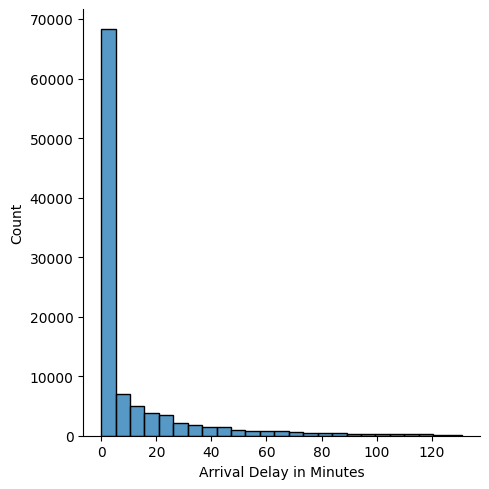

In [125]:
sns.displot(data['Arrival Delay in Minutes'], bins=25)
pass

# Нормализация

In [154]:
norm = (data - data.mean(axis = 0))/data.std(axis = 0)
norm_test = (data_test - data_test.mean(axis = 0))/data_test.std(axis = 0)
norm.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,neutral or dissatisfied,satisfied
count,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,...,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05,1.016790e+05
mean,-4.039120e-17,6.317240e-17,1.222917e-16,-4.164906e-17,2.417882e-17,6.051692e-17,-4.115989e-17,-8.231979e-17,5.506621e-17,1.397619e-17,...,-6.201936e-17,-1.155831e-16,-1.677143e-18,-3.825983e-17,3.825983e-17,3.214525e-17,-8.546443e-17,-2.487763e-17,4.682025e-18,-4.682025e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142423e+00,-1.161482e+00,-2.054831e+00,-2.005585e+00,-1.970604e+00,-2.328807e+00,-2.413734e+00,-2.409365e+00,-1.853160e+00,-2.520699e+00,...,-9.852628e-01,-2.115096e+00,-4.727871e-01,-1.489457e+00,-6.713789e-01,-9.578548e-01,-9.036574e-01,-2.785234e-01,-1.139765e+00,-8.773651e-01
25%,-8.193408e-01,-7.783927e-01,-5.501019e-01,-6.948261e-01,-5.415758e-01,-7.637551e-01,-9.086252e-01,-9.271239e-01,-1.094626e+00,-1.021106e+00,...,-9.852628e-01,4.727871e-01,-4.727871e-01,-1.489457e+00,-6.713789e-01,-9.578548e-01,-9.036574e-01,-2.785234e-01,-1.139765e+00,-8.773651e-01
50%,4.066294e-02,-3.481690e-01,2.022629e-01,-3.944690e-02,1.729383e-01,1.877064e-02,-1.560707e-01,-1.860035e-01,4.224423e-01,4.784867e-01,...,-9.852628e-01,4.727871e-01,-4.727871e-01,6.713789e-01,-6.713789e-01,-9.578548e-01,-9.036574e-01,-2.785234e-01,8.773651e-01,-8.773651e-01
75%,7.683584e-01,5.564039e-01,9.546277e-01,6.159323e-01,8.874524e-01,8.012964e-01,5.964838e-01,5.551169e-01,1.180977e+00,4.784867e-01,...,1.014948e+00,4.727871e-01,-4.727871e-01,6.713789e-01,1.489457e+00,1.043989e+00,1.106603e+00,-2.785234e-01,8.773651e-01,1.139765e+00
max,3.017599e+00,3.804643e+00,1.706992e+00,1.271312e+00,1.601967e+00,1.583822e+00,1.349038e+00,1.296237e+00,1.180977e+00,1.228283e+00,...,1.014948e+00,4.727871e-01,2.115096e+00,6.713789e-01,1.489457e+00,1.043989e+00,1.106603e+00,3.590327e+00,8.773651e-01,1.139765e+00


# Обучающая и тестовая выборки

Разбиение было произведено авторами датасета

---



In [155]:
from sklearn.model_selection import train_test_split

x_train = norm.drop(['satisfied'], axis=1)
y_train = data['satisfied']

x_test = norm_test.drop(['satisfied'], axis=1)
y_test = data_test['satisfied']


# KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 30)}).fit(x_train, y_train)

print('Ошибка : ', 1 - g.best_score_)
print('Оптимальное количество соседей: ', g.best_estimator_.n_neighbors)

Ошибка :  0.005310827761664028
Оптимальное количество соседей:  1


Наилучшее число соседей - 1


In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

kNN_f = KNeighborsClassifier()
kNN_f.n_neighbors = 1
kNN_f.fit(x_train, y_train)
y_train_prediction = kNN_f.predict(x_train)
y_test_prediction = kNN_f.predict(x_test)
cm = confusion_matrix(y_train, y_train_prediction)

На тренировочных данных:

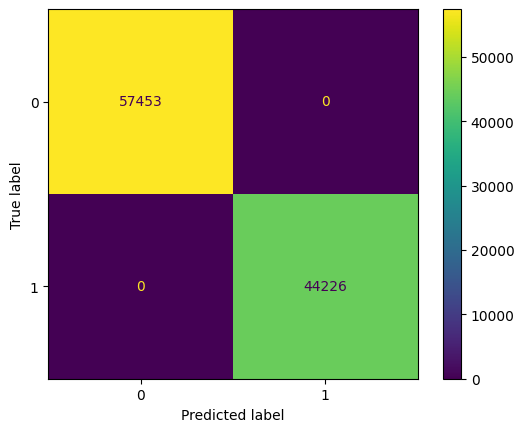

In [162]:


from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kNN_f.classes_)

disp.plot()


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57453
           1       1.00      1.00      1.00     44226

    accuracy                           1.00    101679
   macro avg       1.00      1.00      1.00    101679
weighted avg       1.00      1.00      1.00    101679



На тестовых данных:

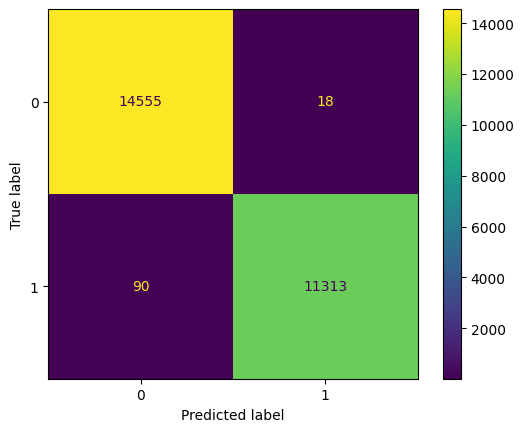

In [165]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kNN_f.classes_)

disp.plot()

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14573
           1       1.00      0.99      1.00     11403

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976

